<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Gabaritos/Lista_HW_07_Gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EQE 358- Métodos Numéricos Aplicados a Processos Químicos
##Lista de Exercícios 07 – Entrega 18/10/2023
###Prof. Pedro Constantino



---


**Atenção!** Antes de iniciar a resolução da lista, vamos importar e definir todos os métodos de integração de sistemas de EDOs que serão utilizados nos exercícios a seguir: Euler Explícito, Euler Implícito, Predição-Correção (Heun) e Runge-Kutta.


---



In [ ]:
import numpy as np

def metodo_euler_explicito(t0, y0, n, h):
    # Inicializa o contador e os vetores de saída para t e y
    k = 0
    t = np.zeros(n)
    y = np.zeros((n,len(y0)))

    # Inicializa x e y com os valores iniciais
    t[0] = t0
    y[0,:] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        y[i+1,:] = y[i,:] + h * getf(y[i,:]) # Atualiza o valor de y usando o método de Euler explícito
        t[i+1] = t[i] + h                    # Incrementa o valor de t

    # Retorna os vetores de saída com os valores de t e y calculados
    return t, y

def metodo_euler_implicito(t0, y0, n, h):
    # Inicializar os vetores de saída para t e y
    neq = len(y0)
    t = np.zeros(n)
    y = np.zeros((n,neq))

    # Definir condição iniciais do PVI e tolerância
    t[0] = t0
    y[0,:] = y0

    # Definir tolerância e máximo de iterações
    tol = 1e-8
    kmax = 100

    for i in range(0,n-1):

        # Inicializar contador e chute inicial para y[i+1]
        k = 0
        y[i+1,:] = y[i,:]   #(Método de Continuação de Ordem Zero)
        t[i+1] = t[i] + h

        # Calcular f e df do Método de Euler Implícito no chute inicial de y[i+1]
        R = y[i+1,:]-y[i,:]-h*getf( y[i+1,:])

        # Fazer iterações de Newton até convergir y[i+1]
        while np.linalg.norm(R) > tol:

            # Calcular a Matriz Jacobiana
            J = np.eye(neq)-h*getJ( y[i+1,:])

            # Resolver o Sistema Linear
            del_y = -np.linalg.solve(J, R)

            # Atualizar y[i+1] pelo Método de Newton
            y[i+1,:] = y[i+1,:] + del_y

            # Atualizar o contador de Newton e os valores de f e df
            k = k + 1
            R = y[i+1,:]-y[i,:]-h*getf(y[i+1,:])
            if k > kmax:
                print('Não convergiu.')
            break

    return t, y

def metodo_heun(t0, y0, n, h):
    # Inicializa os vetores de saída para t e y
    t = np.zeros(n)
    y = np.zeros((n,len(y0)))

    # Inicializa x e y com os valores iniciais
    t[0] = t0
    y[0,:] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Predizer o valor de y usando Euler Explícito
        yp = y[i,:] + h * getf(y[i,:])

        # Corrigir o valor de y usando Euler "Implícito"
        yc = y[i,:] + h * getf(yp)

        # Atualizar y[i+1] como a média da predição-correção
        y[i+1,:] = (yp+yc)/2

        t[i+1] = t[i] + h    # Incrementa o valor de t

    # Retorna os vetores de saída com os valores de t e y calculados
    return t, y

def metodo_Runge_Kutta(t0, y0, n, h):
    # Inicializa os vetores de saída para t e y
    t = np.zeros(n)
    y = np.zeros((n,len(y0)))

    # Inicializa x e y com os valores iniciais
    t[0] = t0
    y[0,:] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Avaliar as funções de Runge-Kutta
        k1 = getf(y[i,:])
        k2 = getf(y[i,:] + h*k1/2)
        k3 = getf(y[i,:] + h*k2/2)
        k4 = getf(y[i,:] + h*k3)

        # Atualizar y[i+1] pela média ponderada
        y[i+1,:] = y[i,:] + (h/6) *(k1 + 2*k2 + 2*k3 + k4)

        t[i+1] = t[i] + h   # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return t, y



---

## Problema 1

---



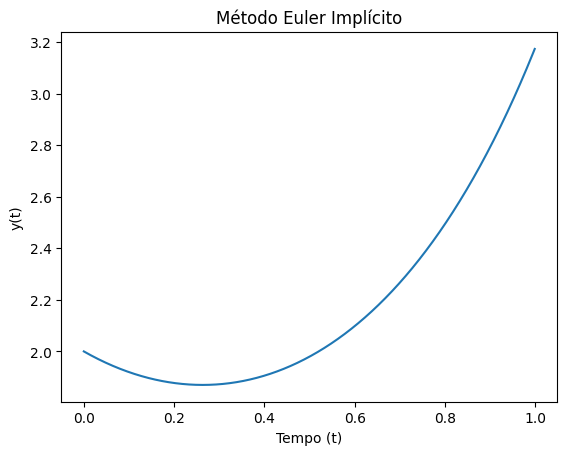

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o sistema de EDOs
def getf(z):
    dz1dt = z[1]
    dz2dt = z[0]**2 + z[2]
    dz3dt = 1.0
    f = np.array([dz1dt, dz2dt,dz3dt])
    return f

# Definir o Jacobiano do sistema de EDOs
def getJ(z):
    J = np.zeros((3,3))
    J[0,1] = 1
    J[1,0] = 2*z[0]
    J[1,2] = 1
    return J

# Definir condições iniciais
z0 = np.array([2,-1,0])

# Definir a condição de integração
t0 = 0      # Escolher o instante inicial
n = 1000     # Definir o número de passos
h = 0.001    # Escolher um passo de integração

# Chamar a função integradora (Solver)
t,z = metodo_euler_implicito(t0, z0, n, h)

# Plotar o gráfico
plt.plot(t,z[:,0])
plt.title('Método Euler Implícito')
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.show()



---

## Problema 2

---



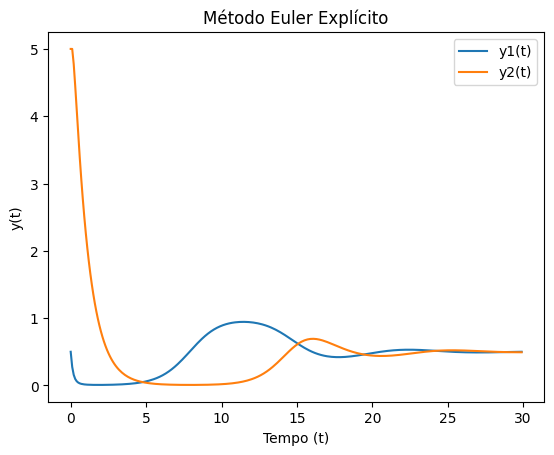

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o sistema de EDOs
def getf(y):
    dy1dt = y[0]*(1-y[0])-y[0]*y[1]
    dy2dt = y[1]*(2*y[0]-1)
    f = np.array([dy1dt, dy2dt])
    return f

# Definir condições iniciais
y0 = np.array([0.5,5.0])

# Definir a condição de integração
t0 = 0      # Escolher o instante inicial
n = 300     # Definir o número de passos
h = 0.1    # Escolher um passo de integração

# Chamar a função integradora (Solver)
t,z = metodo_euler_explicito(t0, y0, n, h)

# Plotar o gráfico
plt.plot(t,z)
plt.title('Método Euler Explícito')
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.legend(['y1(t)','y2(t)'])
plt.show()

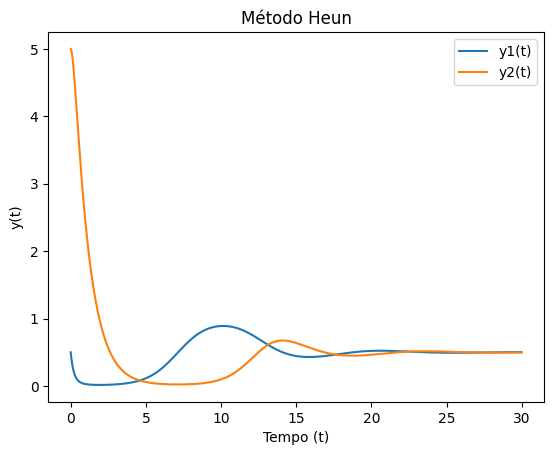

In [ ]:
# Definir a condição de integração
t0 = 0      # Escolher o instante inicial
n = 3000     # Definir o número de passos
h = 0.01    # Escolher um passo de integração

# Chamar a função integradora (Solver)
t,z2 = metodo_heun(t0, y0, n, h)

# Plotar o gráfico
plt.plot(t,z2)
plt.title('Método Heun')
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.legend(['y1(t)','y2(t)'])
plt.show()



---

## Problema 4

---



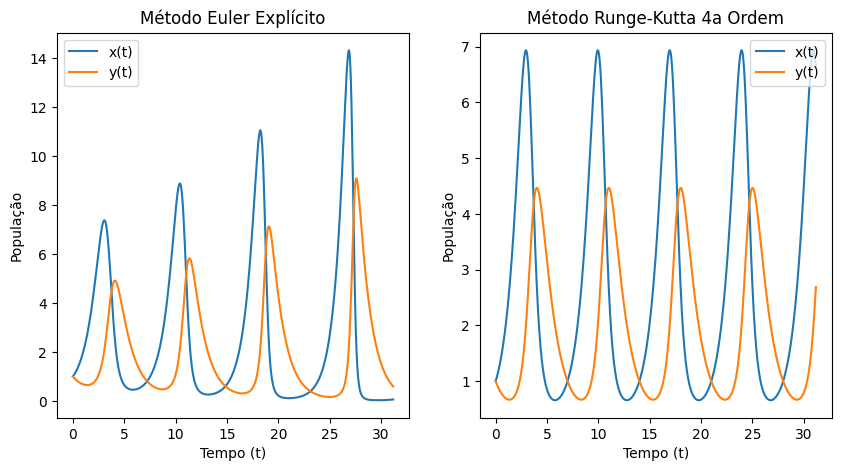

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Inserir Parâmetros do Modelo
a = 1.2
b = 0.6
c = 0.8
d = 0.3

# Definir o sistema de EDOs
def getf(z):
    x = z[0]
    y = z[1]

    dxdt = a*x-b*x*y
    dydt = -c*y+d*x*y

    f = np.array([dxdt, dydt])
    return f

# Definir condições iniciais e intervalo de integração
z0 = np.array([1,1])
t = np.linspace(0,30,200)

# Definir a condição de integração
t0 = 0      # Escolher o instante inicial
n = 500     # Definir o número de passos
h = 0.0625    # Escolher um passo de integração

# Chamar a função integradora (Solver)
t,z1 = metodo_euler_explicito(t0, z0, n, h)
t,z2 = metodo_Runge_Kutta(t0, z0, n, h)

# Plotar o gráfico
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(t,z1)
plt.title('Método Euler Explícito')
plt.xlabel('Tempo (t)')
plt.ylabel('População')
plt.legend(['x(t)','y(t)'])

plt.subplot(1,2,2)
plt.plot(t,z2)
plt.title('Método Runge-Kutta 4a Ordem')
plt.xlabel('Tempo (t)')
plt.ylabel('População')
plt.legend(['x(t)','y(t)'])
plt.show()

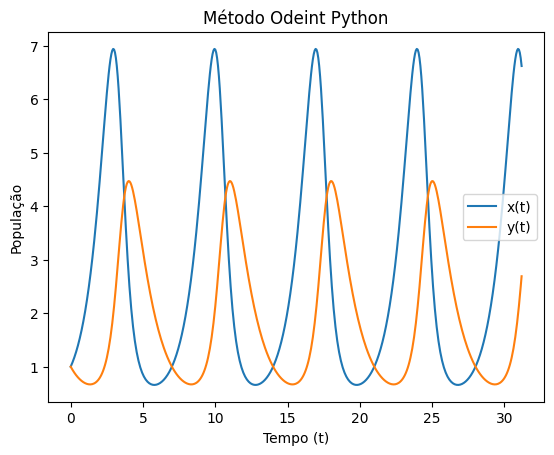

In [ ]:
# Definir o sistema de EDOs
def getf(z,t):
    x = z[0]
    y = z[1]

    dxdt = a*x-b*x*y
    dydt = -c*y+d*x*y

    f = np.array([dxdt, dydt])
    return f

# Chamar a função integradora (Solver)
sol = odeint(getf,z0,t)

# Plotar o gráfico
plt.plot(t,sol)
plt.title('Método Odeint Python')
plt.xlabel('Tempo (t)')
plt.ylabel('População')
plt.legend(['x(t)','y(t)'])
plt.show()



---

## Problema 5

---



In [ ]:
import numpy as np
from numpy.linalg import eig

J1 = np.array([[-10, 10, 0],
               [28, -1, 0],
               [0, 0, -(8/3)]])
lamb1,X1=eig(J1)
print('Autovalores:')
print(lamb1)

Autovalores:
[-22.82772345  11.82772345  -2.66666667]


In [ ]:
J2 = np.array([[-10, 10, 0],
               [1, -1, -6*(2)**0.5],
               [6*(2)**0.5, 6*(2)**0.5, -(8/3)]])
lamb2,X2=eig(J2)
print('Autovalores:')
print(lamb2)

Autovalores:
[-13.85457791 +0.j           0.09395562+10.19450522j
   0.09395562-10.19450522j]


In [ ]:
J3 = np.array([[-10, 10, 0],
               [1, -1, 6*(2)**0.5],
               [-6*(2)**0.5, -6*(2)**0.5, -(8/3)]])
lamb3,X3=eig(J3)
print('Autovalores:')
print(lamb3)

Autovalores:
[-13.85457791 +0.j           0.09395562+10.19450522j
   0.09395562-10.19450522j]


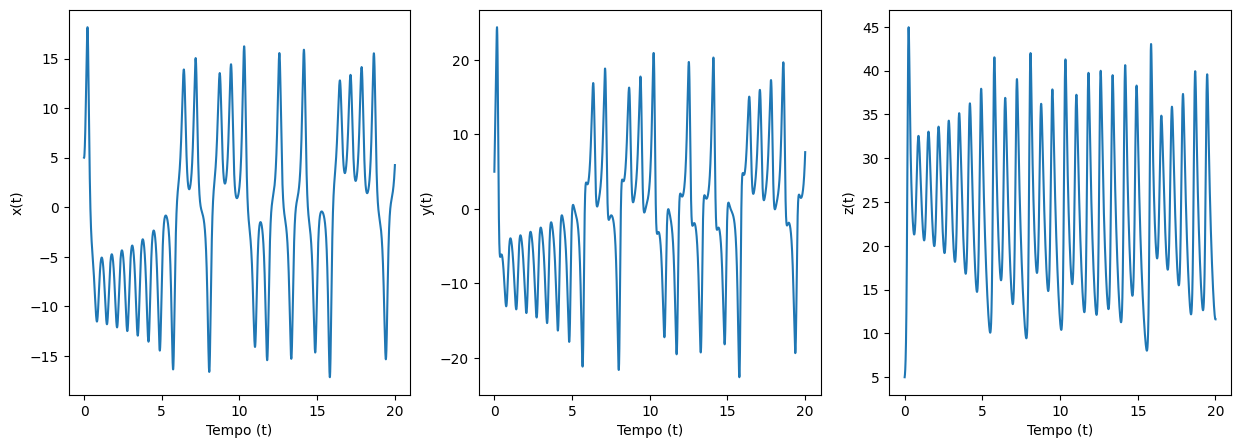

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Inserir Parâmetros do Modelo
sigma = 10
beta = 8/3
rho= 28

# Definir o sistema de EDOs
def getf(z,t):
    x = z[0]
    y = z[1]
    z = z[2]

    dxdt = sigma*(y-x)
    dydt = x*(rho-z)-y
    dzdt = x*y-beta*z

    f = np.array([dxdt, dydt, dzdt])
    return f

# Definir condições iniciais e intervalo de integração
z0 = np.array([5,5,5])
npts = int(1e6)     # Usar um número alto de pontos
t = np.linspace(0,20,npts)

# Chamar a função integradora (Solver)
sol = odeint(getf,z0,t)

# Plotar o gráfico
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(t,sol[:,0])
plt.xlabel('Tempo (t)')
plt.ylabel('x(t)')

plt.subplot(1,3,2)
plt.plot(t,sol[:,1])
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')

plt.subplot(1,3,3)
plt.plot(t,sol[:,2])
plt.xlabel('Tempo (t)')
plt.ylabel('z(t)')
plt.show()

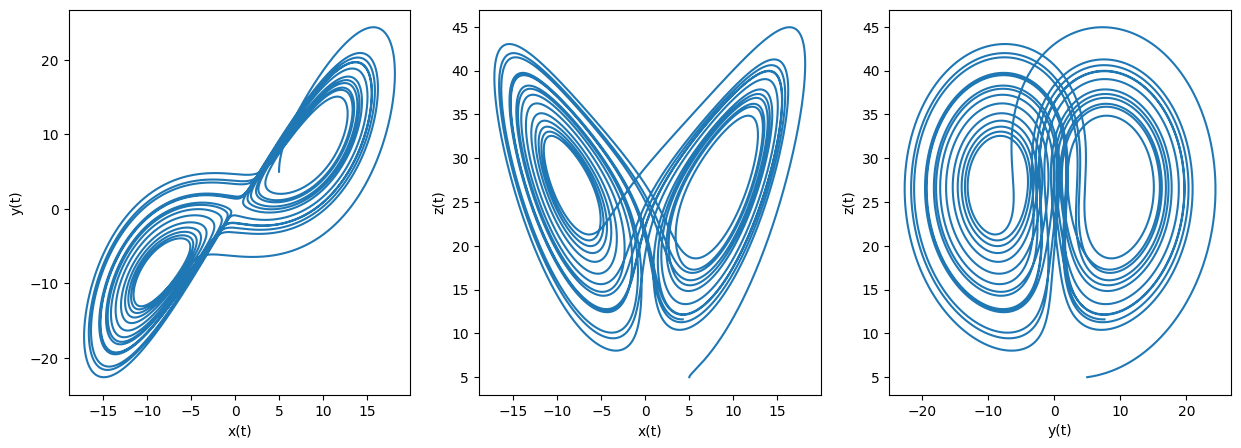

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(sol[:,0],sol[:,1])
plt.xlabel('x(t)')
plt.ylabel('y(t)')

plt.subplot(1,3,2)
plt.plot(sol[:,0],sol[:,2])
plt.xlabel('x(t)')
plt.ylabel('z(t)')

plt.subplot(1,3,3)
plt.plot(sol[:,1],sol[:,2])
plt.xlabel('y(t)')
plt.ylabel('z(t)')
plt.show()

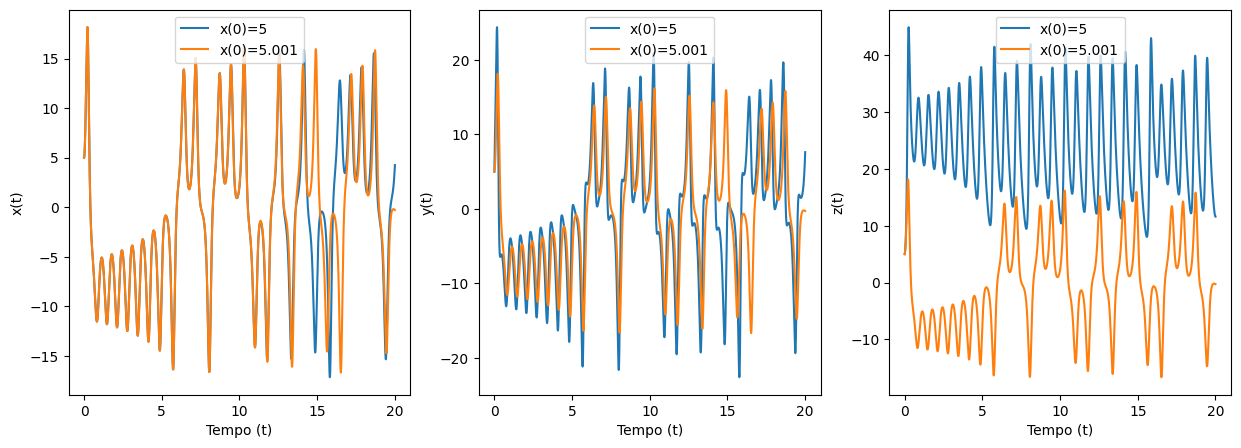

In [ ]:
# Definir condições iniciais e intervalo de integração
z0 = np.array([5.001,5,5])
npts = int(1e6)     # Usar um número alto de pontos
t = np.linspace(0,20,npts)

# Chamar a função integradora (Solver)
sol2 = odeint(getf,z0,t)

# Plotar o gráfico
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(t,sol[:,0])
plt.plot(t,sol2[:,0])
plt.xlabel('Tempo (t)')
plt.ylabel('x(t)')
plt.legend(['x(0)=5', 'x(0)=5.001'],loc='upper center')

plt.subplot(1,3,2)
plt.plot(t,sol[:,1])
plt.plot(t,sol2[:,0])
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.legend(['x(0)=5', 'x(0)=5.001'],loc='upper center')

plt.subplot(1,3,3)
plt.plot(t,sol[:,2])
plt.plot(t,sol2[:,0])
plt.xlabel('Tempo (t)')
plt.ylabel('z(t)')
plt.legend(['x(0)=5', 'x(0)=5.001'],loc='upper center')
plt.show()

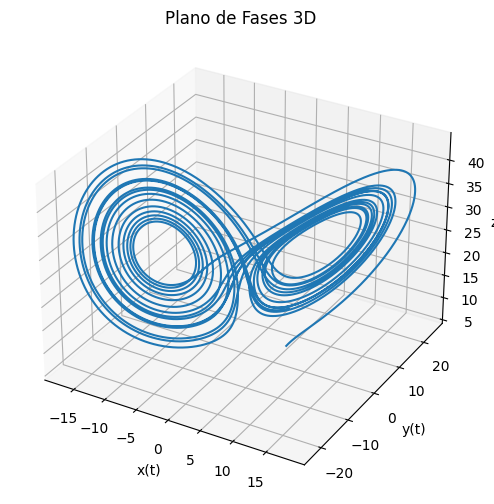

In [ ]:
# Criar uma figura e especificar o tamanho
fig = plt.figure(figsize = (7,6))

# Criar os eixos tridimensionais
ax = plt.axes(projection='3d')
ax.grid()

# Plotar o gráfico
ax.plot3D(sol[:,0], sol[:,1], sol[:,2])

# Colocar título no gráfico
ax.set_title('Plano de Fases 3D')

# Colocar nome nos eixos
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')

plt.show()